<a href="https://colab.research.google.com/github/Ar1si4/P0nzuAr1/blob/master/00_Training.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# 機械学習の説明
まず実際にプログラミングに入る前に、機械学習とは何を復習しましょう。
説明は、以下の資料で復習しましょう。（手抜き

[機械学習](https://qiita.com/taki_tflare/items/42a40119d3d8e622edd2)

# データ分析の進め方

[データ分析の流れ](https://www.procrasist.com/entry/24-data-analysis-guide)

# 実際にサンプルを動かしてみましょう。
今回の課題に近い形の教師あり学習である回帰について、サンプルを動かしてPythonとデータ分析に慣れましょう。
課題は、「ボストン市の住宅価格を線形回帰で予測する」というものです。

#  0.準備

In [0]:
"""
【Python】としての準備
・分析に必要なデータと、ライブラリをインポート

"""

#機械学習用のライブラリ
from sklearn.datasets import load_boston #
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error

# データ分析でよく用いるライブラリ
import pandas as pd #データ加工（表形式）やファイルの入出力
import seaborn as sns 
import numpy as np #行列の計算
import matplotlib.pyplot as plt #プロット用


# 1. データ収集

(1)サンプルデータのダウンロードをします。今回は、ボストン市の住宅価格のデータをダウンロードします。


In [0]:
boston = load_boston() 
print(boston.data.shape) #形のチェック

(506, 13)


In [0]:
# データフレームに変換
# データフレーム型は、Pandasが扱う表形式のデータ型
df = pd.DataFrame(boston.data, columns=boston.feature_names)

In [0]:
#どんなデータなのか、確認
df.head(5)

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT
0,0.00632,18.0,2.31,0.0,0.538,6.575,65.2,4.0900,1.0,296.0,15.3,396.90,4.98
1,0.02731,0.0,7.07,0.0,0.469,6.421,78.9,4.9671,2.0,242.0,17.8,396.90,9.14
2,0.02729,0.0,7.07,0.0,0.469,7.185,61.1,4.9671,2.0,242.0,17.8,392.83,4.03
3,0.03237,0.0,2.18,0.0,0.458,6.998,45.8,6.0622,3.0,222.0,18.7,394.63,2.94
4,0.06905,0.0,2.18,0.0,0.458,7.147,54.2,6.0622,3.0,222.0,18.7,396.90,5.33


In [0]:
#【補足】どんなデータなのか、確認(tail)
df.tail(5)

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT
501,0.06263,0.0,11.93,0.0,0.573,6.593,69.1,2.4786,1.0,273.0,21.0,391.99,9.67
502,0.04527,0.0,11.93,0.0,0.573,6.120,76.7,2.2875,1.0,273.0,21.0,396.90,9.08
503,0.06076,0.0,11.93,0.0,0.573,6.976,91.0,2.1675,1.0,273.0,21.0,396.90,5.64
504,0.10959,0.0,11.93,0.0,0.573,6.794,89.3,2.3889,1.0,273.0,21.0,393.45,6.48
505,0.04741,0.0,11.93,0.0,0.573,6.030,80.8,2.5050,1.0,273.0,21.0,396.90,7.88


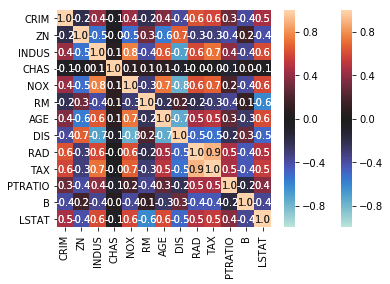

In [0]:
# データ間の相関係数を求める
corr_mat = df.corr(method="pearson") 
# ヒートマップで可視化
sns.heatmap(corr_mat, vmax=1, vmin=-1, center=0, annot=True, fmt=".1f")
# データ間の相関係数を求める
corr_mat = df.corr(method="pearson") 
# ヒートマップで可視化
sns.heatmap(corr_mat, vmax=1, vmin=-1, center=0, annot=True, fmt=".1f")

# 2.データ加工

In [0]:
#学習できるようなデータの形に変換
train_data_df = pd.DataFrame(boston.data,columns=boston.feature_names) #ダウンロードしたデータ部
train_label_df = pd.DataFrame(boston.target) #ダウンロードした正解データ（今回で住宅価格）

In [0]:
#ダウンロードしたデータ部
train_data_df.head()

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT
0,0.00632,18.0,2.31,0.0,0.538,6.575,65.2,4.0900,1.0,296.0,15.3,396.90,4.98
1,0.02731,0.0,7.07,0.0,0.469,6.421,78.9,4.9671,2.0,242.0,17.8,396.90,9.14
2,0.02729,0.0,7.07,0.0,0.469,7.185,61.1,4.9671,2.0,242.0,17.8,392.83,4.03
3,0.03237,0.0,2.18,0.0,0.458,6.998,45.8,6.0622,3.0,222.0,18.7,394.63,2.94
4,0.06905,0.0,2.18,0.0,0.458,7.147,54.2,6.0622,3.0,222.0,18.7,396.90,5.33


In [0]:
#ダウンロードした正解データ（今回は住宅価格）
train_label_df.head()

,0
0,24.0
1,21.6
2,34.7
3,33.4
4,36.2


# 3.機械学習
機械学習（ランダムフォレストの説明)をします。説明は以下の資料を確認してください。
[ランダムフォレスト](https://techblog.gmo-ap.jp/2017/10/02/%E6%A9%9F%E6%A2%B0%E5%AD%A6%E7%BF%92%E3%81%AE%E5%AE%9F%E8%B7%B5%E5%85%A5%E9%96%80%E3%83%BCrandom-forest%E3%81%AE%E8%A6%81%E7%B4%84/)

# 学習

In [0]:
#データ（データフレーム型）を、機械学習のライブラリのインプットとできるように加工（DataFrame型⇒nArray型へ)
#import numpy as np #行列の計算

data_arrray = np.array(train_data_df)
label_arrray= np.array(train_label_df)

 【注意】
本来、「学習させたいデータ」と「テストしたいデータ」は別々に用意されるため、 次の工程は本来不要です。今回は、「テストしたいデータ」がなかったため、「学習させたいデータ」を分割して、作成します。

In [0]:
#データの分割
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(data_arrray, label_arrray, train_size=0.8)

In [0]:
X_train

array([[4.20300e-02, 2.80000e+01, 1.50400e+01, ..., 1.82000e+01,
        3.95010e+02, 8.16000e+00],
       [2.98190e-01, 0.00000e+00, 6.20000e+00, ..., 1.74000e+01,
        3.77510e+02, 3.92000e+00],
       [4.12380e-01, 0.00000e+00, 6.20000e+00, ..., 1.74000e+01,
        3.72080e+02, 6.36000e+00],
       ...,
       [4.09740e+00, 0.00000e+00, 1.95800e+01, ..., 1.47000e+01,
        3.96900e+02, 2.64200e+01],
       [4.55587e+00, 0.00000e+00, 1.81000e+01, ..., 2.02000e+01,
        3.54700e+02, 7.12000e+00],
       [4.75470e-01, 0.00000e+00, 9.90000e+00, ..., 1.84000e+01,
        3.96230e+02, 1.27300e+01]])

In [0]:
#y_train

In [0]:
#y_test

In [0]:
# 学習データを使ってモデルを構築する
from sklearn.ensemble import RandomForestRegressor #ランダムフォレストのライブラリをインポート
regr = RandomForestRegressor() #モデルの宣言
regr.fit(X_train, y_train) #モデルにデータをいれ、学習させる。

/usr/local/lib/python3.6/dist-packages/sklearn/ensemble/forest.py:245: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)
/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:3: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  This is separate from the ipykernel package so we can avoid doing imports until


RandomForestRegressor(bootstrap=True, criterion='mse', max_depth=None,
                      max_features='auto', max_leaf_nodes=None,
                      min_impurity_decrease=0.0, min_impurity_split=None,
                      min_samples_leaf=1, min_samples_split=2,
                      min_weight_fraction_leaf=0.0, n_estimators=10,
                      n_jobs=None, oob_score=False, random_state=None,
                      verbose=0, warm_start=False)

In [0]:
#モデルのパラメータ設定【精度はここのパラメータチューニングとデータ加工が重要!!!】
RandomForestRegressor(bootstrap=True, criterion='mse', max_depth=None,
           max_features='auto', max_leaf_nodes=None,
           min_impurity_split=1e-07, min_samples_leaf=1,
           min_samples_split=2, min_weight_fraction_leaf=0.0,
           n_estimators=10, n_jobs=1, oob_score=False, random_state=None,
           verbose=0, warm_start=False)

RandomForestRegressor(bootstrap=True, criterion='mse', max_depth=None,
                      max_features='auto', max_leaf_nodes=None,
                      min_impurity_decrease=0.0, min_impurity_split=1e-07,
                      min_samples_leaf=1, min_samples_split=2,
                      min_weight_fraction_leaf=0.0, n_estimators=10, n_jobs=1,
                      oob_score=False, random_state=None, verbose=0,
                      warm_start=False)

# 評価

In [0]:
# テストデータのyの予測値を求める
y_predicted = regr.predict(X_test)

# 実際のyの値と予測値を比較して、テストデータに関するR2決定係数を確認する
from sklearn import metrics
R2test = metrics.r2_score(y_test, y_predicted)
print(R2test)

0.8047906864572173
